In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors




In [2]:
!pip install scikit-learn

In [3]:
# Importing csv files into notebook

movies = pd.read_csv("CSVfiles/MovieCSVfiles/movies.csv")
ratings = pd.read_csv("CSVfiles/MovieCSVfiles/ratings.csv")
links = pd.read_csv("CSVfiles/MovieCSVfiles/links.csv")
tags = pd.read_csv("CSVfiles/MovieCSVfiles/tags.csv")

# Looking at the format of the table
print(movies.head(10))
print(ratings.head(10))

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  
7                           Adventure|Children  
8       

In [19]:
# We want to see what all the movies and which users rated them and which didnt.

new_dataset = ratings.pivot(index='movieId', columns='userId', values='rating')
new_dataset = new_dataset.fillna(0)
print(new_dataset.head())

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  4.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  4.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  0.0  0.0  2.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  2.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        3.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 610 columns]


In [20]:
# We want to replace the NaN to 0 to show that it was not rated by the user. 

print(new_dataset.fillna(0).head())

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  4.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  4.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  0.0  0.0  2.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  2.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        3.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 610 columns]


In [21]:
# Want to plot a graph to see the graph of how many users voted for each movie. Graph A

no_of_users_voted = ratings.groupby('movieId')['rating'].count()

In [22]:
# Want to see how many movies were voted by users. Graph B

no_of_movies_voted = ratings.groupby('userId')['rating'].count()

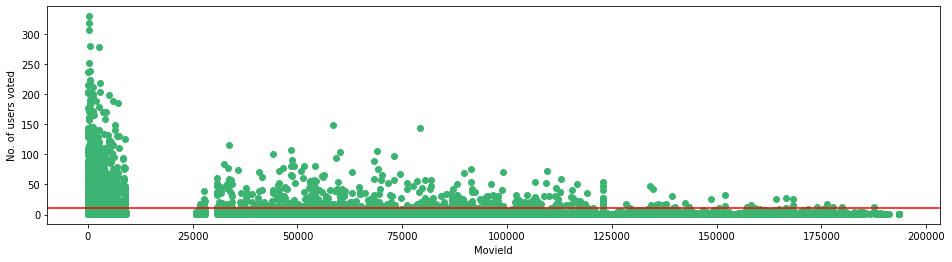

In [23]:
# Plotting Graph A

f,ax = plt.subplots(1,1, figsize=(16,4))
plt.scatter(no_of_users_voted.index,no_of_users_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [24]:
# we can see that some movies between 10,000 to 25,000 where not rated by any users so that would
# cost that is wasteful data(noise).


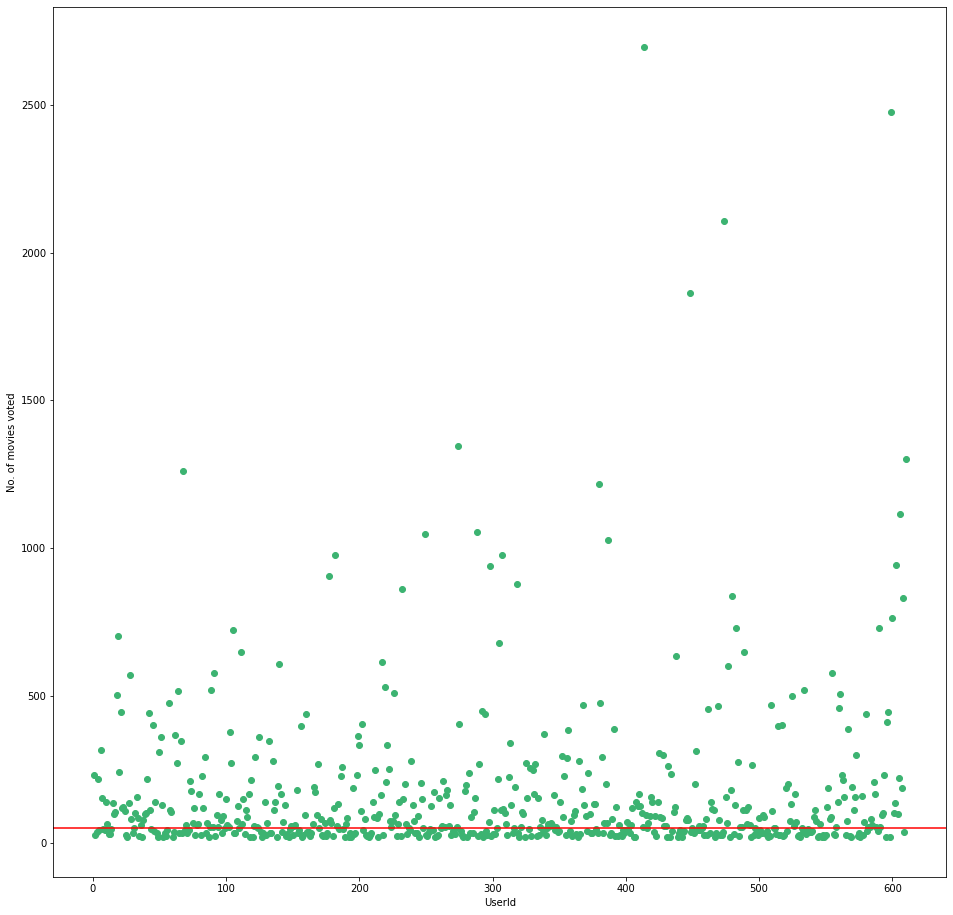

In [25]:
# Plotting Graph B

f,ax = plt.subplots(1,1, figsize=(16,16))
plt.scatter(no_of_movies_voted.index,no_of_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of movies voted')
plt.show()


In [26]:
# filtering the dataset

final_dataset = new_dataset.loc[no_of_users_voted[no_of_users_voted > 10].index,:]
final_dataset = new_dataset.loc[:,no_of_movies_voted[no_of_movies_voted > 50].index]

In [27]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)
csr_data


<9724x378 sparse matrix of type '<class 'numpy.float64'>'
	with 93462 stored elements in Compressed Sparse Row format>

In [34]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)


NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [37]:
# now we create the recommendation system
# so using KNN we will get the top 10 movies with the closest distance to the movie put into the function

def get_movie_recommendation(movie_name):
    n_movies_to_recommend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_recommend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_recommend+1))
        return df
    else:
        return "No movies found. Please check your input"


In [38]:
get_movie_recommendation('Batman')

,Title,Distance
1,Die Hard: With a Vengeance (1995),0.427554
2,"Lion King, The (1994)",0.427317
3,Aladdin (1992),0.426649
4,"Mask, The (1994)",0.409414
5,Cliffhanger (1993),0.408718
6,GoldenEye (1995),0.405572
7,Jurassic Park (1993),0.404032
8,Ace Ventura: Pet Detective (1994),0.384173
9,True Lies (1994),0.359396
10,Batman (1989),0.305549


In [39]:
# would need to develop it further by using genre instead of just collaborative filtering